## (A) Identification of Candidate Datasets

### Candidate Dataset 1: Goodreads Reviews (Comics & Graphic)

**Dataset name & source:**  
  Goodreads Reviews — *Comics & Graphic* (by-genre)  
  UCSD McAuley Lab public datasets:  
  https://mcauleylab.ucsd.edu:8443/public_datasets/gdrive/goodreads/byGenre/goodreads_reviews_comics_graphic.json.gz

**Course topic alignment :**  
  - Text mining (TF-IDF/embeddings)
  - clustering
  - Anomaly Detection

**Potential beyond-course techniques:**  
  - Topic modeling (LDA/BERTopic)
  - Transformer-based embeddings (SBERT)
  - Aspect-based sentiment analysis

**Dataset size & structure:**  
  - 542,338 detailed reviews in **JSON Lines** format (`goodreads_reviews_comics_graphic.json.gz`).  
  Compressed size: **~141 MB (.gz)**; uncompressed size: **~450 MB**.
  - 89,411 books, 7,347,630 interactions.

**Data types:**  
  - `user_id` (string ID)  
  - `book_id` (string ID)  
  - `review_id` (string ID)  
  - `rating` (integer 1–5)  
  - `review_text` (free text; multilingual possible)  
  - `date_added`, `date_updated` (timestamp strings)  
  - `read_at`, `started_at` (timestamp strings; can be empty)  
  - `n_votes` (integer)  
  - `n_comments` (integer)
  - `review_len_tokens` (integer)

**Target variable(s), if any:**  
  - **`rating`** as a supervised target (sentiment classification/regression)  

**Licensing / usage constraints:**  
  McAuley Lab research dataset; typically **for research/educational use**.  

---

### Candidate Dataset 2: Amazon Fine Foods Reviews

- **Dataset name & source:**  
  Amazon Fine Foods Reviews (SNAP Stanford)  
  https://snap.stanford.edu/data/finefoods.txt.gz

- **Course topic alignment:**
  - Frequent Itemsets / Association Rules  
  - Text Mining
  - Clustering

- **Potential beyond-course techniques:**  
  - **Sequential pattern mining** on time-ordered user product interactions
  - **Time-series / change-point detection** for product “review bursts” or shifts in average score over time  
  - **Mixed-effects models** (hierarchical modeling) for rating variability across users/products

- **Dataset size & structure:**  
  - ~500,000 Food reviews stored as a structured text file with key-value fields per review  
  - Compressed size: **~116.45 MB (.gz)**; uncompressed size: **~354 MB**

- **Data types:**  
  - `product/productId` (ID)  
  - `review/userId` (ID)  
  - `review/profileName` (text)  
  - `review/helpfulness` (ratio like 1/1)  
  - `review/score` (numeric)  
  - `review/time` (Unix time)  
  - `review/summary` (short text)  
  - `review/text` (text)

- **Target variable(s), if any:**  
  - None required for frequent itemsets/association rules (unsupervised)  
  - Optional targets: `review/score` (supervised), `review/helpfulness` (helpful-vote prediction)

- **Licensing / usage constraints:**  
  SNAP dataset terms apply (research/educational use; cite SNAP and follow any redistribution constraints stated on the page).
---

### Candidate Dataset 3: NYC Yellow Taxi Trip Data

- **Dataset name & source:**  
  NYC Yellow Taxi Trip Data — `yellow_tripdata_2016-03.csv` (Kaggle)  
  https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data

- **Course topic alignment:**  
  - Anomaly detection
  - Stream mining
  - Clustering

- **Potential beyond-course techniques:**  
  - Change-point detection**  
  - Spatial hotspot detection / KDE or HDBSCAN
  - Trajectory/spatiotemporal forecasting

- **Dataset size & structure:**  
  Single large **CSV** file: `yellow_tripdata_2016-03.csv`  
  File size: **~1.91 GB**; tabular trip-level records (one row per trip)

- **Data types :**  
  - `VendorID` (categorical/int)  
  - `tpep_pickup_datetime`, `tpep_dropoff_datetime` (timestamps)  
  - `Passenger_count` (int)  
  - `Trip_distance` (float)  
  - `Pickup_longitude`, `Pickup_latitude` (geo floats)  
  - `Dropoff_longitude`, `Dropoff_latitude` (geo floats)  
  - `RateCodeID` (categorical/int)  
  - `Store_and_fwd_flag` (binary categorical)  
  - `Payment_type` (categorical/int)  
  - `Fare_amount`, `Extra`, `MTA_tax`, `Improvement_surcharge`, `Tip_amount`, `Tolls_amount`, `Total_amount` (numeric)

- **Target variable(s), if any:**  
  None required (unsupervised anomaly detection / pattern mining).  
  Optional supervised targets: `Tip_amount` (regression) or “high tip” indicator (classification).

- **Licensing / usage constraints:**  
  Kaggle dataset usage rules apply; underlying TLC trip data is generally for public/research



## (B) Comparative Analysis of Datasets

| Dimension | Goodreads Reviews (Comics & Graphic) *(selected)* | Amazon Fine Foods Reviews (SNAP) | NYC Yellow Taxi Trips (2016-03) |
|------|------|------|------|
| Supported data mining tasks | Text mining + clustering (course), Topic modeling / SBERT (external) | Frequent itemsets/association rules (course), Sequential patterns / change-point detection (external) | Anomaly detection + stream/temporal mining (course), Spatial hotspot detection / change-point detection (external) |
| Data quality issues | Noisy + multilingual text, missing/empty timestamps, rating skew | Noisy text, helpfulness ratio parsing, user/product long-tail sparsity | Invalid GPS, inconsistent times, fare/distance outliers, missing/unknown codes |
| Algorithmic feasibility | TF-IDF + clustering feasible; SBERT/topic modeling may require sampling/GPU | FP-Growth feasible; Apriori often infeasible at low support; sequential mining costly without constraints | Full CSV may require chunking; scalable spatial methods needed; basic anomaly rules feasible |
| Bias considerations | Self-selection + popularity bias; genre-specific slice; language bias | Self-selection/positivity bias; exposure bias toward popular items; temporal bias | Coverage bias (yellow taxis only); geographic/service bias; cash-tip undercount bias |
| Ethical considerations | Risk of profiling readers; avoid deanonymization and quoting unique reviews | Risk of harming users/products via “spam” claims; avoid releasing identifiable text | Sensitive mobility patterns; re-identification risk from time+location; use aggregated reporting |


## (C) Dataset Selection

### Goodreads Reviews (Comics & Graphic)

**Reasons:**
- Directly supports **core course techniques** with minimal reshaping: **text mining (TF‑IDF/embeddings)** on `review_text` and **clustering** of reviews/books/users; also supports **anomaly detection** via unusual rating/vote/time patterns.
- Provides a clear, high-impact **beyond-course extension** on the *same data*: **topic modeling (LDA/BERTopic)** and **transformer-based embeddings (SBERT)** enable a strong “course vs external” comparison (traditional representations vs modern semantic representations).
- Has **richer signals than the other candidates** for meaningful analysis: combines **free text + explicit ratings + engagement (`n_votes`, `n_comments`) + timestamps**, enabling both unsupervised discovery (topics/clusters) and supervised tasks (rating prediction) without inventing proxy labels.
- More **computationally feasible** than the NYC taxi file while still being large enough to be realistic: ~141MB compressed / ~450MB uncompressed and 542k reviews supports robust experiments on a single machine, whereas the taxi CSV (1.91GB) often requires heavy chunking and slows iteration.
- Avoids the main methodological drawback of Fine Foods for non-text tasks: Fine Foods can do association rules/sequences, but it requires **defining baskets and sequences from reviews**, which introduces modeling assumptions; Goodreads naturally fits NLP-driven techniques with fewer artificial transformations.

**Trade-offs:**
- **Evaluation limitations:** topic modeling has no ground-truth labels, and ratings are often skewed toward high values, so evaluation may rely on coherence/manual checks and careful handling of imbalance.
- **Compute constraints for modern NLP:** SBERT/BERTopic on 542k reviews can be expensive; may require sampling, batching, or GPU resources to stay feasible.
**Trade-offs:**
- **Noisy text + missing fields:** reviews can be short/typo-heavy and sometimes non-English; some timestamps (e.g., `read_at`, `started_at`) are empty, requiring cleaning, parsing, and possible filtering.


# (D) Exploratory Data Analysis (EDA)

This section performs structured exploratory data analysis on the selected dataset (Goodreads Reviews — Comics & Graphic).  
The goals of this EDA are:

- Understand the dataset structure (records, entities, key fields) and validate schema consistency.
- Quantify data quality issues (missing values, duplicates, invalid timestamps, noisy/short reviews) to guide cleaning.
- Characterize core distributions (ratings, review lengths, engagement) and identify skew/imbalance.
- Analyze interaction behavior by reshaping reviews into **user→book baskets**: basket-size distribution, top-item frequency, and sparsity.
- Examine temporal patterns (review volume over time and per-user gaps) to support time-aware analyses.
- Produce initial observations that motivate beyond-course techniques (e.g., topic modeling, transformer embeddings, change-point detection).

## EDA Assumptions
- Each JSON line represents a single review event written by one `user_id` about one `book_id` (unique identifier `review_id`).
- `rating` is treated as an ordinal numeric variable (1–5) and can be used as a proxy for sentiment.
- Empty strings in time fields (`started_at`, `read_at`) indicate missing values (not “zero time”) and will be converted to NA.
- `date_added` is treated as the closest approximation to the time of the reviewing/interaction event for temporal analyses.
- A user’s “basket” is defined as the **set of distinct `book_id`s** reviewed by that `user_id` (order ignored unless doing sequential/temporal analysis).
- Co-occurrence between books is defined by **appearing in the same user basket** (user-level co-read signal), not by textual similarity.
- Review text is user-generated and may be multilingual; analyses may either (a) keep multilingual text with multilingual models or (b) filter to one language, depending on feasibility.

In [3]:
# ---------------------------------------------
# Goodreads Reviews (Comics & Graphic) - EDA
# Focus: baskets, top items, co-occurrence sparsity, temporal gaps, + basic data checks
# ---------------------------------------------

import gzip, json
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

DATA_PATH = "goodreads_reviews_comics_graphic.json.gz"

In [4]:
# ---------------------------------------------
# Load JSON Lines from .json.gz into a DataFrame
# ---------------------------------------------
rows = []
with gzip.open(DATA_PATH, "rt", encoding="utf-8") as f:
    for line in f:
        rows.append(json.loads(line))

df = pd.DataFrame(rows)
df.shape

(542338, 11)

In [8]:
# ---------------------------------------------
# 2) Basic schema inspection + missingness
# ---------------------------------------------

display(df.head(3))
display(df.info())

missing_pct = (df.isna().mean().sort_values(ascending=False) * 100).to_frame("missing_%")
missing_pct

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,review_len_tokens
0,dc3763cdb9b2cae805882878eebb6a32,18471619,66b2ba840f9bd36d6d27f46136fe4772,3,Sherlock Holmes and the Vampires of London \n ...,2013-12-05 10:44:25-08:00,2013-12-05 10:45:15-08:00,2013-11-05 00:00:00-08:00,NaT,0,0,662
1,bafc2d50014200cda7cb2b6acd60cd73,6315584,72f1229aba5a88f9e72f0dcdc007dd22,4,"I've never really liked Spider-Man. I am, howe...",NaT,NaT,NaT,2016-08-10 00:00:00-07:00,0,0,36
2,bafc2d50014200cda7cb2b6acd60cd73,29847729,a75309355f8662caaa5e2c92ab693d3f,4,"A very quick introduction, this is coming out ...",NaT,NaT,NaT,2016-04-21 00:00:00-07:00,0,0,120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542338 entries, 0 to 542337
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype                                 
---  ------             --------------   -----                                 
 0   user_id            542338 non-null  object                                
 1   book_id            542338 non-null  object                                
 2   review_id          542338 non-null  object                                
 3   rating             542338 non-null  int64                                 
 4   review_text        542015 non-null  object                                
 5   date_added         184857 non-null  datetime64[ns, tzoffset(None, -28800)]
 6   date_updated       180748 non-null  datetime64[ns, tzoffset(None, -28800)]
 7   read_at            162864 non-null  datetime64[ns, tzoffset(None, -28800)]
 8   started_at         209386 non-null  datetime64[ns, tzoffset(None, -25200)]
 9   n_vo

None

,missing_%
read_at,69.970019
date_updated,66.672444
date_added,65.914799
started_at,61.391973
review_text,0.059557
review_id,0.000000
book_id,0.000000
user_id,0.000000
rating,0.000000
n_votes,0.000000


In [9]:
# ---------------------------------------------
# Basic cleaning: empty strings -> NA; parse datetime; basic length feature
# ---------------------------------------------
time_cols = ["date_added", "date_updated", "read_at", "started_at"]

for c in time_cols:
    if c in df.columns:
        df[c] = df[c].replace("", pd.NA)

df["review_text"] = df["review_text"].replace("", pd.NA)

for c in time_cols:
    df[c] = pd.to_datetime(df[c], errors="coerce")

df["review_len_tokens"] = df["review_text"].fillna("").str.split().map(len)

df[["user_id","book_id","review_id","rating","n_votes","n_comments"]].head(3)

,user_id,book_id,review_id,rating,n_votes,n_comments
0,dc3763cdb9b2cae805882878eebb6a32,18471619,66b2ba840f9bd36d6d27f46136fe4772,3,0,0
1,bafc2d50014200cda7cb2b6acd60cd73,6315584,72f1229aba5a88f9e72f0dcdc007dd22,4,0,0
2,bafc2d50014200cda7cb2b6acd60cd73,29847729,a75309355f8662caaa5e2c92ab693d3f,4,0,0


,count
rating,
0,12806
1,11063
2,39354
3,121916
4,192486
5,164713


,review_len_tokens
count,542338.000000
mean,90.138913
std,139.502060
min,0.000000
50%,44.000000
90%,221.000000
95%,331.000000
99%,655.630000
max,4999.000000


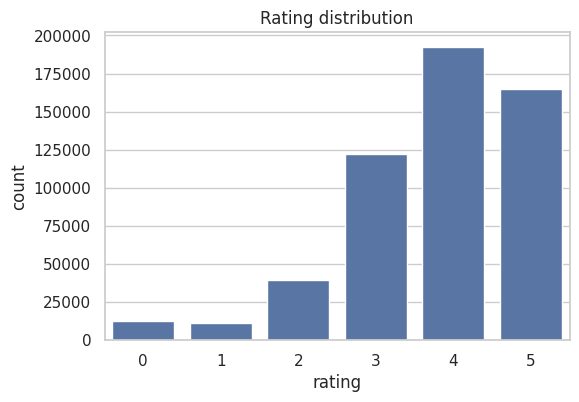

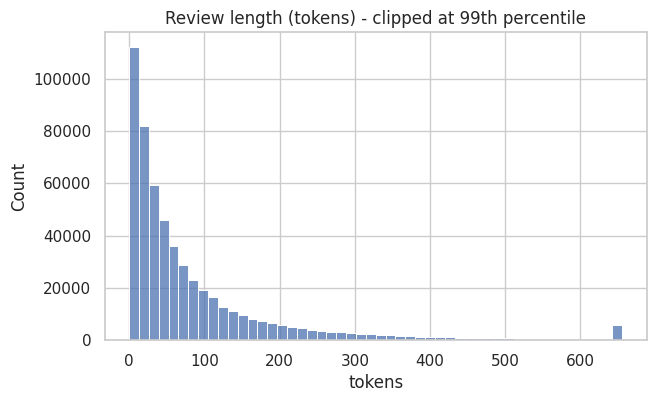

In [10]:
# ---------------------------------------------
# 4) Core distributions: ratings + review length (sanity context for later steps)
# ---------------------------------------------

df["review_len_tokens"] = df["review_text"].fillna("").str.split().map(len)

display(df["rating"].value_counts().sort_index())
display(df["review_len_tokens"].describe(percentiles=[.5, .9, .95, .99]))

plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=df, order=sorted(df["rating"].dropna().unique()))
plt.title("Rating distribution")
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(df["review_len_tokens"].clip(upper=df["review_len_tokens"].quantile(0.99)), bins=50)
plt.title("Review length (tokens) - clipped at 99th percentile")
plt.xlabel("tokens")
plt.show()

,book_id
count,59347.000000
mean,9.138423
std,40.846092
min,1.000000
50%,2.000000
90%,16.000000
95%,33.000000
99%,128.000000
max,2850.000000


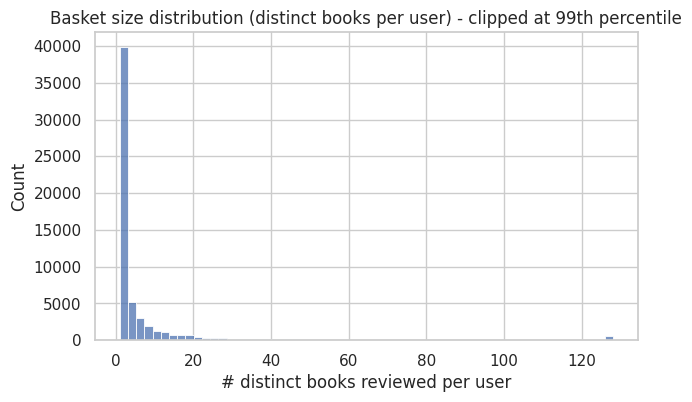

In [12]:
# ---------------------------------------------
# 5) Distribution of basket sizes (books per user)
# Basket = distinct book_id values reviewed by the same user_id
# ---------------------------------------------

user_basket_sizes = (
    df.dropna(subset=["user_id", "book_id"])
      .groupby("user_id")["book_id"]
      .nunique()
)

display(user_basket_sizes.describe(percentiles=[.5, .9, .95, .99]))

plt.figure(figsize=(7,4))
sns.histplot(user_basket_sizes.clip(upper=user_basket_sizes.quantile(0.99)), bins=60)
plt.title("Basket size distribution (distinct books per user) - clipped at 99th percentile")
plt.xlabel("# distinct books reviewed per user")
plt.show()

In [13]:
# ---------------------------------------------
# 6) Frequency of top items (most-reviewed books)
# ---------------------------------------------

book_freq = (
    df.dropna(subset=["book_id"])
      .groupby("book_id")
      .size()
      .sort_values(ascending=False)
)

display(book_freq.describe(percentiles=[.5, .9, .95, .99]))
top_books = book_freq.head(20).to_frame("review_count")
top_books

,0
count,89311.000000
mean,6.072466
std,31.660591
min,1.000000
50%,2.000000
90%,10.000000
95%,19.000000
99%,71.000000
max,2953.000000


,review_count
book_id,
15704307,2953
17571564,2151
472331,1757
19351043,1742
17131869,1639
18659623,1493
20898019,1470
19358975,1292
22554204,1219


In [14]:
# ---------------------------------------------
# 7) Sparsity of item co-occurrence (book-book)
# Co-occurrence defined as "two books appear in the same user basket"
# ---------------------------------------------

baskets = (
    df.dropna(subset=["user_id", "book_id"])
      .groupby("user_id")["book_id"]
      .apply(lambda x: sorted(set(x)))
)

pair_counts = Counter()
for books in baskets:
    if len(books) < 2:
        continue
    for a, b in combinations(books, 2):
        pair_counts[(a, b)] += 1

num_pairs_observed = len(pair_counts)
n_books = df["book_id"].nunique()
num_pairs_possible = n_books * (n_books - 1) // 2
cooc_sparsity = 1 - (num_pairs_observed / num_pairs_possible)

pd.DataFrame({
    "n_books": [n_books],
    "observed_book_pairs": [num_pairs_observed],
    "possible_book_pairs": [num_pairs_possible],
    "cooccurrence_sparsity": [cooc_sparsity]
})

,n_books,observed_book_pairs,possible_book_pairs,cooccurrence_sparsity
0,89311,41031493,3988182705,0.989712


In [15]:
# ---------------------------------------------
# 8) Top co-occurring book pairs (for intuition)
# (IDs only; avoid printing raw review text in reports)
# ---------------------------------------------

top_pairs = pd.Series(pair_counts).sort_values(ascending=False).head(20)
top_pairs.to_frame("cooccurrence_count")

cooccurrence_count
15704307 17131869                1248
         19358975                 909
17131869 19358975                 901
15704307 23093367                 758
19358975 23093367                 719
17131869 23093367                 717
23093367 25451555                 601
15704307 25451555                 591
17131869 25451555                 538
19358975 25451555                 529
15704307 20898019                 480
25451555 28862528                 474
20898019 23017947                 473
15704307 28862528                 458
23093367 28862528                 427
17131869 28862528                 417
15704307 20299683                 416
19358975 28862528                 412
20299683 23012877                 380
15704307 19351043                 374

,gap_days
count,151610.000000
mean,74.421339
std,214.073748
min,0.000000
50%,2.914172
90%,298.040308
95%,378.824325
99%,1086.572009
max,3313.987639


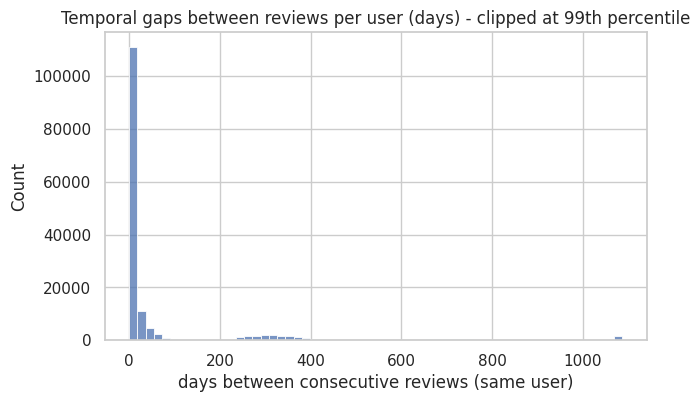

In [16]:
# ---------------------------------------------
# 9) Temporal gaps between transactions (reviews) per user
# Using date_added as interaction timestamp; compute gap in days between consecutive reviews per user
# ---------------------------------------------

tmp = df.dropna(subset=["user_id", "date_added", "book_id"]).copy()
tmp = tmp.sort_values(["user_id", "date_added"])

tmp["gap_days"] = tmp.groupby("user_id")["date_added"].diff().dt.total_seconds() / (3600 * 24)

gap = tmp["gap_days"].dropna()
display(gap.describe(percentiles=[.5, .9, .95, .99]))

plt.figure(figsize=(7,4))
sns.histplot(gap.clip(upper=gap.quantile(0.99)), bins=60)
plt.title("Temporal gaps between reviews per user (days) - clipped at 99th percentile")
plt.xlabel("days between consecutive reviews (same user)")
plt.show()

In [17]:
# ---------------------------------------------
# 10)Initial observations motivating external techniques
# ---------------------------------------------

obs = {
    "rows": len(df),
    "unique_users": int(df["user_id"].nunique()),
    "unique_books": int(df["book_id"].nunique()),
    "pct_missing_review_text": float(df["review_text"].isna().mean() * 100),
    "pct_reviews_very_short(<=3_tokens)": float((df["review_len_tokens"] <= 3).mean() * 100),
    "pct_missing_started_at": float(df["started_at"].isna().mean() * 100),
    "pct_missing_read_at": float(df["read_at"].isna().mean() * 100),
    "rating_skew_top2(4or5)": float(df["rating"].isin([4,5]).mean() * 100),
    "cooccurrence_sparsity": float(cooc_sparsity),
}

pd.Series(obs).to_frame("value")

,value
rows,542338.000000
unique_users,59347.000000
unique_books,89311.000000
pct_missing_review_text,0.059557
pct_reviews_very_short(<=3_tokens),5.480346
pct_missing_started_at,61.391973
pct_missing_read_at,69.970019
rating_skew_top2(4or5),65.862801
cooccurrence_sparsity,0.989712


## EDA Summary
- **Loaded and validated the dataset structure:** Read the `.json.gz` JSON-lines file into a DataFrame and checked columns/types to confirm each row represents a single user review of a book.
- **Cleaned critical fields to avoid misleading results:** Converted empty strings in time fields to missing values and parsed timestamps into datetime objects so temporal analyses (sorting, gaps, durations) are valid.
- **Measured basic content characteristics:** Computed rating distribution, review-length statistics, and engagement (`n_votes`, `n_comments`) to understand skew, noise, and potential imbalance.
- **Reframed reviews as interaction “transactions” for basket-style analysis:** Grouped by `user_id` to create user baskets of `book_id`s, enabling **basket size distribution** and **top item frequency** analyses.
- **Quantified co-read structure and sparsity:** Computed book–book co-occurrence pairs from user baskets and measured sparsity to assess whether association-style mining is likely to be informative at realistic support thresholds.
- **Analyzed temporal behavior:** Used `date_added` to compute per-user time gaps between reviews and overall activity trends, providing evidence for time-aware methods (e.g., burst/change-point analysis).
- **Produced diagnostic signals to motivate external techniques:** Observed short/noisy text, rating skew, missing time fields, and high co-occurrence sparsity,supporting the use of **topic modeling** and **transformer embeddings (SBERT)** and guiding thresholding/filtering decisions.

## (E) Initial Insights and Direction

**Observation 1:** Ratings are strongly skewed positive: ~65.9% of reviews are 4★ or 5★.  
**Hypothesis:** Simple bag-of-words sentiment models may over-predict positivity; separating *what* readers talk about (themes/aspects) from *how much* they like it will be more informative than overall sentiment.  
**Potential RQs:**
- Does topic prevalence differ between low ratings (1–2★) and high ratings (4–5★)?
- Which themes/aspects are most predictive of rating after controlling for review length?

**Observation 2:** Time fields are frequently missing (`started_at` ~61.4% missing, `read_at` ~70.0% missing).  
**Hypothesis:** Reading-duration style analyses will be unreliable, but `date_added`/`date_updated` still support meaningful temporal analyses (activity bursts, trend shifts).  
**Potential RQs:**
- Are there identifiable bursts in review activity over time for specific books or overall?
- Do bursts coincide with shifts in average rating or topic distribution (change-point detection)?

**Observation 3:** Book–book co-occurrence is extremely sparse (co-occurrence sparsity ≈ 0.9897).  
**Hypothesis:** High support thresholds in frequent itemset / association mining will miss most meaningful co-read relationships; useful structure likely exists in the long tail and may require filtering to active users/books or using embedding-based similarity.  
**Potential RQs:**
- How do different minimum-support thresholds change the number and interpretability of co-read rules?
- Do semantic clusters (SBERT/topic clusters) align with co-read communities, or do they reveal different groupings?

**Observation 4:** A non-trivial share of reviews are very short (≤ 3 tokens: ~5.48%).  
**Hypothesis:** Short/noisy reviews reduce the effectiveness of TF-IDF and LDA; transformer embeddings (SBERT) or BERTopic-style pipelines should yield more coherent groupings.  
**Potential RQs:**
- How does clustering quality change when using TF-IDF vs SBERT embeddings, especially for short reviews?
- Should very short reviews be filtered, or can SBERT meaningfully place them into topics/clusters?

**Observation 5:** The dataset contains a large user base (~ 59,347 users) and many books (~ 89,311), implying a long-tail interaction structure (many users/books with few reviews).  
**Hypothesis:** Graph or basket-based analyses (co-read networks, association rules) will be dominated by sparsity and cold-start effects unless we apply frequency thresholds (e.g., keep users with ≥k reviews and books with ≥m reviews).  
**Potential RQs:**
- How do user/book frequency thresholds affect the density of the user–book graph and the stability of discovered communities?
- Do communities discovered in the filtered graph remain stable when thresholds change?

**Observation 6:** Engagement signals (`n_votes`, `n_comments`) are available and often sparse/zero-inflated (many reviews receive no votes/comments).  
**Hypothesis:** High-engagement reviews may represent higher-quality or more influential content and could yield cleaner topics/stronger sentiment–theme relationships than the full corpus.  
**Potential RQs:**
- Are topics extracted from high-vote reviews more coherent or distinct than topics from all reviews?
- What features (topic, length, rating extremity) are associated with receiving votes/comments?

# (F) GitHub Portfolio Building

## Public Repository

Repository link: https://github.com/gprath-tamu/Goodreads_Reviews



## Resources

On my honor, I declare the following resources:

1. **Collaborators:** None

2. **Web Sources:**
   - Goodreads Reviews (Comics & Graphic) - https://mcauleylab.ucsd.edu:8443/public_datasets/gdrive/goodreads/byGenre/
   - Amazon Fine Foods Reviews - https://snap.stanford.edu/data/#reviews
   - NYC Yellow Taxi Trip Data - https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data
   - EDA Sumamry - https://medium.com/data-and-beyond/mastering-exploratory-data-analysis-eda-everything-you-need-to-know-7e3b48d63a95

3. **AI Tools:**
    - TamuGPT for project structuring, documentation drafting, and code design

4. **Citations:** None
